In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

In [3]:
## distribution of each numeric column

In [4]:
houses.columns

Index(['median_house_value', 'median_income', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude',
       'longitude'],
      dtype='object')

### plotting utility

In [6]:
## plotting utility

import matplotlib.pyplot as plt
import numpy as np
from math import ceil

##
## type= {boxplot, kdeplot}
##
def plot_distributions(data, columns, type='boxplot', title=None):

    print("plotting columns {c}".format(c=list(columns)))
    
    if type not in {'boxplot', 'dkeplot'}:
        print("type= {boxplot, dkeplot} only are supported")
        return

    ## grid size depends on number of columns
    ## max 4 columns in the grid
    maxCols  = 4
    
    if len(columns) < 4:
        numCols = len(columns)
    else:
        numCols = maxCols
    numRows = ceil(len(columns) / 4)
    
    print("grid is {0}x{1}".format(numRows, numCols))

    fig, axs = plt.subplots(numRows, numCols)
    fig.suptitle(title)
    fig.set_figwidth(5*numCols)
    fig.set_figheight(3*numCols)
    fig.tight_layout(pad=5.0)

    print(axs)

#         handle special axes
    if numRows == 1 and numCols == 1:
        c = columns[0]
        # axes is a scalar
        if type == 'boxplot':
            sns.boxplot(data=data, x=c, ax=axs)
        else:
            sns.kdeplot(data=data, x=c, ax=axs)
        axs.set_title(c)

    elif numRows == 1:
        i = 0
        # axes is a 1D array
        for c in columns:
#         print("column {c}".format(c=c))
            if type == 'boxplot':
                sns.boxplot(data=data, x=c, ax=axs[i])
            else:
                sns.kdeplot(data=data, x=c, ax=axs[i])
            axs[i].set_title(c)
            i = i+1
        
    else:
    # general case of a 2D grid    
        i=j=0    
        for c in columns:
            print("column {c}".format(c=c))
            if type == 'boxplot':
                print("plotting on axes [{0},{1}]".format(i,j))
                sns.boxplot(data=data, x=c, ax=axs[i,j])
            else:
                sns.kdeplot(data=data, x=c, ax=axs[i,j])

            axs[i,j].set_title(c)
            j = j+1
            if j == 4:
                i = i+1
                j= 0


### Descriptive analytics: start by looking at raw statistics for the features in this dataset. what sort of story are they telling?

feel free to use the plot utility defined above

plotting columns ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
column median_house_value
plotting on axes [0,0]
column median_income
plotting on axes [0,1]
column housing_median_age
plotting on axes [0,2]
column total_rooms
plotting on axes [0,3]
column total_bedrooms
plotting on axes [1,0]
column population
plotting on axes [1,1]
column households
plotting on axes [1,2]
column latitude
plotting on axes [1,3]
column longitude
plotting on axes [2,0]


,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000


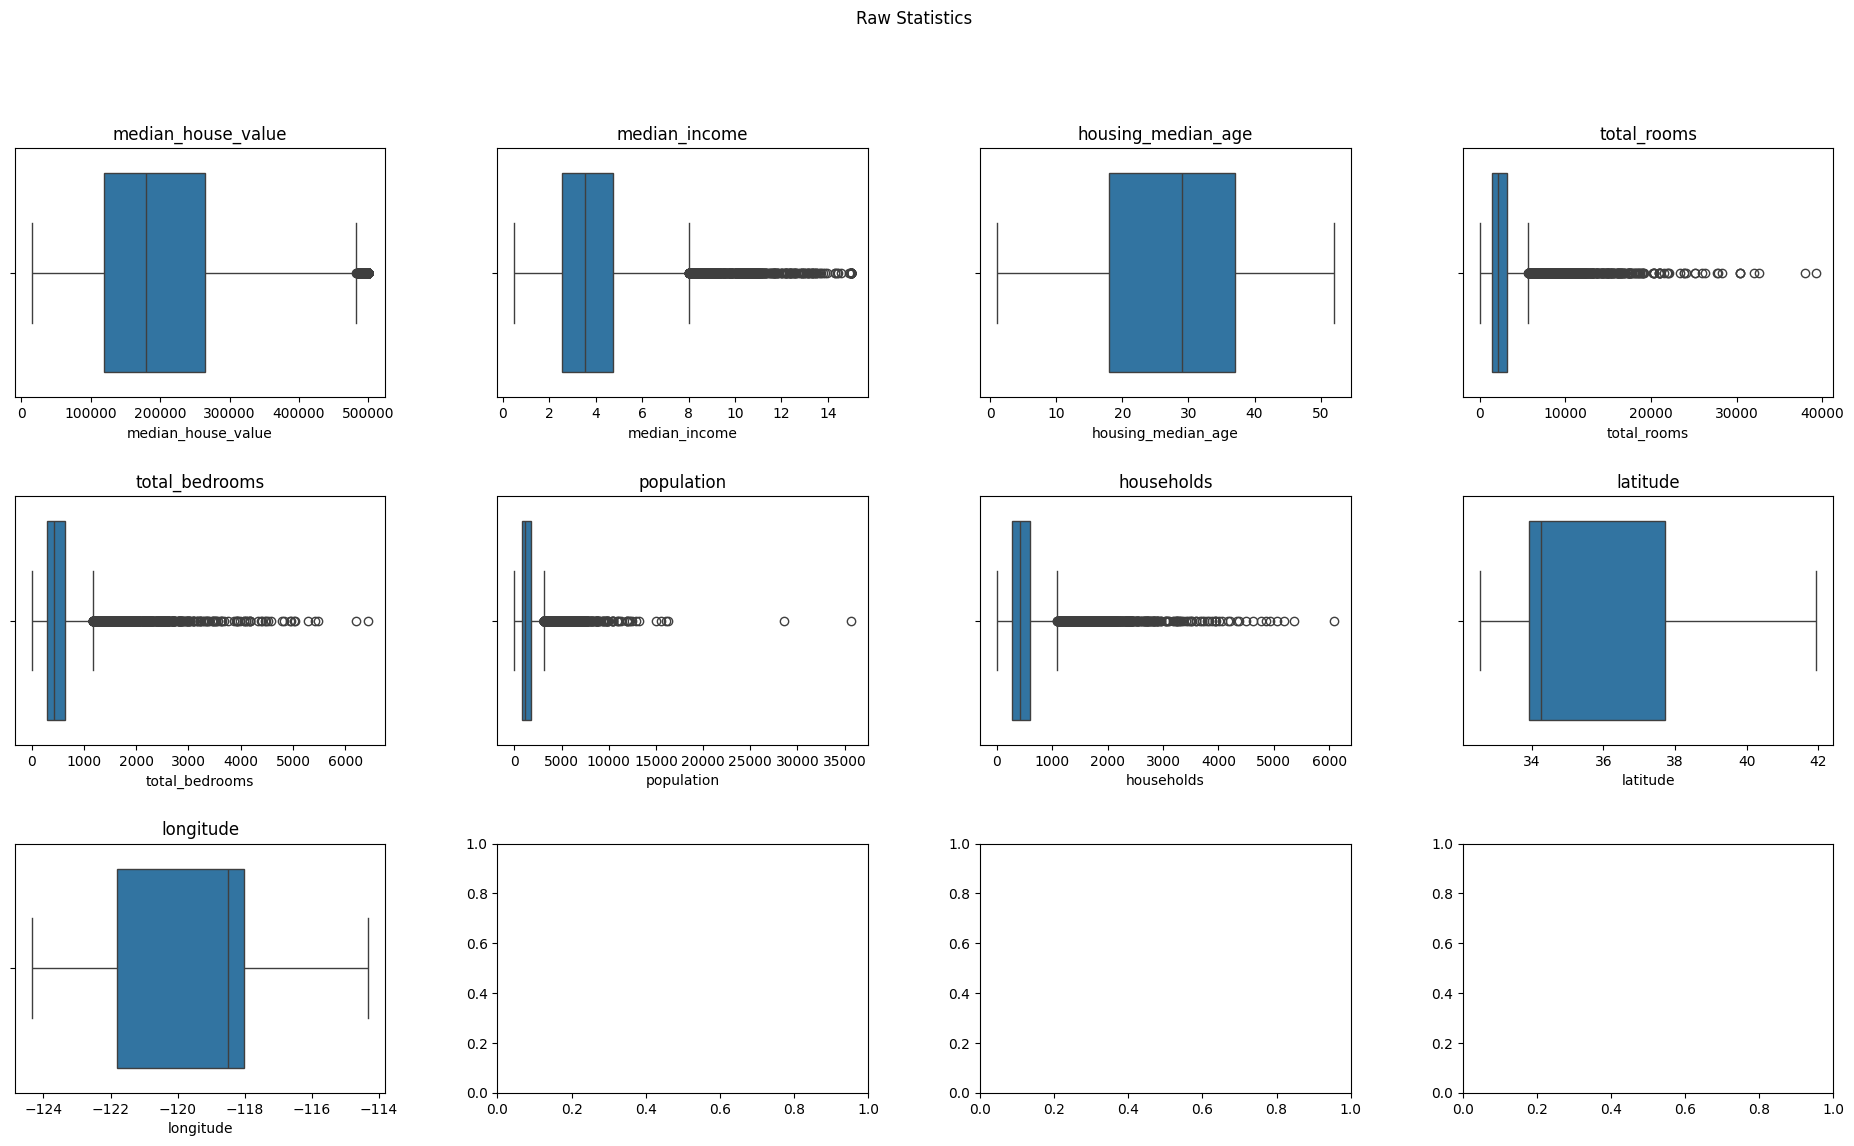

In [9]:
## Plot distributions and describe dataset 
plot_distributions(houses, houses.columns, type='boxplot', title='Raw Statistics')
houses.describe()

### feature normalisation 

Some of the features need to be normalised before any conclusion can be drawn

In [5]:
## Normalise the features
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Select the columns to be normalised
columns_to_normalise = ['feature1', 'feature2', 'feature3']

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Normalise the selected columns
houses_normalised = houses.copy()
houses_normalised[columns_to_normalize] = scaler.fit_transform(houses_normalized[columns_to_normalize])

# Print the normalised dataset
print(houses_normalized)


KeyError: "None of [Index(['feature1', 'feature2', 'feature3'], dtype='object')] are in the [columns]"

### record identification

based on analysis of the normalised features, try and pinpoint specific records that may be outliers, and explain why

In [6]:
## your code here 

have you completely solved the problem? how do we know for sure?

we may have removed too much (FP) or too little (FN). Can you suggest empirical validation of your findings?

In [74]:
corr1 = houses_normalised_clean.median_house_value.corr(houses_normalised_clean.rooms_per_household)
corr2 = houses_normalised_clean.median_house_value.corr(houses_normalised_clean.bedrooms_per_household)

print("correlations: median value to number of rooms: {0:.2}, median value to number of bedrooms: {1:.2}".format(corr1, corr2))

correlations: median value to number of rooms: 0.27, median value to number of bedrooms: -0.089


it appears that house value is not strongly correlated with size, so probably location is a more relevant factor

## next, try using LOF and / or KNN and see if the results align with your empirical analysis

In [7]:
from sklearn.neighbors import LocalOutlierFactor

In [21]:
## your code here

## Your overall conclusions here